# Downloading and Extracting the Cornell Movie-Dialogs Corpus
This code downloads a dataset from Kaggle and copies it to the current working directory for easier access.

#### Key Steps:
1. **KaggleHub Download**:
   - Uses `kagglehub.dataset_download()` to fetch the `"rajathmc/cornell-moviedialog-corpus"` dataset.
   - The downloaded dataset's path is stored in `path` and printed for verification.

2. **Local Directory Setup**:
   - Imports `shutil` and `os` to handle file operations.
   - Sets `source_path` to the downloaded dataset location.
   - Defines `destination_path` as the current working directory (via `os.getcwd()`).

3. **Copying Files**:
   - Uses `shutil.copytree()` to recursively copy the dataset to a new folder named `"cornell-moviedialog-corpus"` in the current directory.
   - Prints the destination path for confirmation.

#### Notes:
- **Prerequisites**:
  - Requires the `kagglehub` package installed (`pip install kagglehub`).
  - Ensure Kaggle credentials are configured if the dataset is private.
- **Output**:
  - The dataset files will be available in `./cornell-moviedialog-corpus/`.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajathmc/cornell-moviedialog-corpus")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cornell-moviedialog-corpus


In [ ]:
import shutil
import os

# Source path (where the dataset was downloaded)
source_path = path

# Destination path (current working directory)
destination_path = os.getcwd()  # Gets the current working directory

# Copy all contents from source to destination
shutil.copytree(source_path, os.path.join(destination_path, "cornell-moviedialog-corpus"))

print(f"Dataset copied to: {os.path.join(destination_path, 'cornell-moviedialog-corpus')}")

Dataset copied to: /content/cornell-moviedialog-corpus


## Processing the Cornell Movie-Dialogs Corpus
Following code processes the movie conversations and lines from the Cornell Movie-Dialogs Corpus to extract question-answer (QA) pairs for dialogue modeling.

#### Key Steps:

1. **File Paths and Initialization**:
   - `corpus_movie_conv`: Path to the conversations file (`movie_conversations.txt`).
   - `corpus_movie_lines`: Path to the dialogue lines file (`movie_lines.txt`).
   - `max_len`: Maximum allowed length of a sentence (25 words).

2. **Reading Data**:
   - Conversations (`conv`) and dialogue lines (`lines`) are loaded into memory.
   - The lines file uses `latin-1` encoding to handle special characters.

3. **Building a Lines Dictionary**:
   - `lines_dict` maps each line ID (e.g., `L194`) to its corresponding text by splitting on `" +++$+++ "`.
   - Example: `lines_dict["L194"]` → "First dialogue line text..."

4. **Text Preprocessing**:
   - `remove_punc()` removes punctuation and converts text to lowercase for uniformity.
   - Example: `"Hello, World!"` → `"hello world"`.

5. **Extracting QA Pairs**:
   - For each conversation in `conv`, the line IDs are extracted (e.g., `['L194', 'L195', ...]`).
   - Adjacent lines are paired as questions and answers:
     - `first`: The current line (preprocessed).
     - `second`: The next line (preprocessed).
   - Each pair is truncated to `max_len` words and added to `pairs`.

6. **Output**:
   - The total number of QA pairs (`221616`) is printed, showing the scale of the dataset.

#### Example QA Pair:
# Input:
["hello how are you", "i am fine thanks"]

# Preprocessed (max_len=3):
[["hello", "how", "are"], ["i", "am", "fine"]]

In [ ]:
# Paths to the movie conversation and lines files
corpus_movie_conv = "cornell-moviedialog-corpus/movie_conversations.txt"
corpus_movie_lines = "cornell-moviedialog-corpus/movie_lines.txt"

# Maximum length for sequences
max_len = 25

# Read conversation data
with open(corpus_movie_conv, "r") as c:
    conv = c.readlines()

# Read movie lines with Latin-1 encoding
with open(corpus_movie_lines, "r", encoding='latin-1') as l:
    lines = l.readlines()

In [ ]:
lines[:10]

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!\n',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!\n',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.\n',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?\n',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.\n",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow\n',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.\n",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No\n',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?\n',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?\n']

In [ ]:
lines_dict = {}
for line in lines:
  objects = line.split(" +++$+++ ")
  lines_dict[objects[0]] = objects[-1]

In [ ]:
def remove_punc(string):
    # Define punctuation characters to remove
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punc = ""

    # Iterate through each character and remove punctuation
    for char in string:
        if char not in punctuations:
            no_punc += char

    # Return the cleaned string in lowercase
    return no_punc.lower()

In [ ]:
eval(conv[0].split(" +++$+++ ")[-1])

['L194', 'L195', 'L196', 'L197']

In [ ]:
# Initialize an empty list to store conversation pairs
pairs = []

# Iterate through each conversation in the conversation data
for con in conv:
    # Extract the list of line IDs involved in the conversation
    ids = eval(con.split(" +++$+++ ")[-1])

    # Iterate through each line ID to form question-answer pairs
    for i in range(len(ids)):
        qa_pairs = []

        # Skip the last line as it doesn't have a subsequent line to pair with
        if i == len(ids) - 1:
            break

        # Get and clean the current line and the next line
        first = remove_punc(lines_dict[ids[i]].strip())
        second = remove_punc(lines_dict[ids[i + 1]].strip())

        # Split the lines into words and limit to max_len words
        qa_pairs.append(first.split()[:max_len])
        qa_pairs.append(second.split()[:max_len])

        # Add the question-answer pair to the pairs list
        pairs.append(qa_pairs)

In [ ]:
len(pairs)

221616

### Building Vocabulary from Dialogue Pairs
Following code creates a vocabulary mapping for the dialogue pairs by analyzing word frequencies and assigning special tokens.

#### Key Steps:

1. **Word Frequency Counting**:
   - Uses `Counter` from `collections` to count occurrences of each word across all question-answer pairs.
   - Iterates through `pairs`, updating counts for words in both questions (`pair[0]`) and answers (`pair[1]`).

2. **Vocabulary Filtering**:
   - Keeps only words that appear more than `min_word_freq` (5) times to filter out rare words.
   - This helps reduce vocabulary size and eliminates noise from infrequent words.

3. **Word-to-Index Mapping**:
   - Creates `word_map` dictionary where each word is assigned a unique integer:
     - Frequent words are numbered sequentially starting from 1
     - Adds four special tokens:
       - `<pad>` → 0 (for padding shorter sequences)
       - `<unk>` → for unknown/rare words
       - `<start>` → to mark beginning of sequences
       - `<end>` → to mark end of sequences

4. **Vocabulary Persistence**:
   - Saves the `word_map` dictionary as a JSON file (`WORDMAP_corpus.json`) for later use in model training.

#### Example Output:
{
  "`<pad>`": 0,
  "hello": 1,
  "how": 2,
  ...
  "`<unk>`": 2532,
  "`<start>`": 2533,
  "`<end>`": 2534
}

In [ ]:
from collections import Counter

word_freq = Counter()
for pair in pairs:
  word_freq.update(pair[0])
  word_freq.update(pair[1])

word_freq

Counter({'can': 14103,
         'we': 25912,
         'make': 5821,
         'this': 30502,
         'quick': 310,
         'roxanne': 1,
         'korrine': 1,
         'and': 52131,
         'andrew': 49,
         'barrett': 20,
         'are': 21713,
         'having': 1081,
         'an': 8827,
         'incredibly': 49,
         'horrendous': 4,
         'public': 306,
         'break': 799,
         'up': 14316,
         'on': 23908,
         'the': 120903,
         'quad': 2,
         'again': 2807,
         'well': 16263,
         'i': 137639,
         'thought': 4202,
         'wed': 541,
         'start': 1459,
         'with': 21394,
         'pronunciation': 2,
         'if': 16727,
         'thats': 14742,
         'okay': 5946,
         'you': 169695,
         'not': 26496,
         'hacking': 18,
         'gagging': 9,
         'spitting': 15,
         'part': 1260,
         'please': 3258,
         'then': 7532,
         'how': 14001,
         'bout': 393,
         'try

In [ ]:
# Minimum word frequency threshold
min_word_freq = 5

# Filter words that meet the minimum frequency requirement
words = [w for w in word_freq.keys() if word_freq[w] > min_word_freq]

# Create word-to-index mapping, starting from 1
word_map = {k: v + 1 for v, k in enumerate(words)}

# Add special tokens to the word map
word_map['<unk>'] = len(word_map) + 1  # Unknown words
word_map['<start>'] = len(word_map) + 1  # Start token
word_map['<end>'] = len(word_map) + 1  # End token
word_map['<pad>'] = 0  # Padding token (assigned index 0)

In [ ]:
# Save word map to JSON file
import json
with open("WORDMAP_corpus.json", "w") as j:
    json.dump(word_map, j)

### Encoding Text Sequences for Model Training
Following code converts the preprocessed text pairs into numerical sequences suitable for neural network training, while handling special tokens and padding.

#### Encoding Functions:

1. **`encode_question(question_words, word_map)`**:
   - Converts a question into numerical indices
   - **Process**:
     - Each word is looked up in `word_map` (uses `<unk>` for missing words)
     - Padding (`<pad> = 0`) is added to reach `max_len`
   - **Example**: `["how", "are", "you"]` → `[12, 25, 63, 0, 0, ...]` (for `max_len=25`)

2. **`encode_reply(answer_words, word_map)`**:
   - Converts an answer with special sequence tokens
   - **Process**:
     - Starts with `<start>` token
     - Includes word indices (with `<unk>` for unknowns)
     - Ends with `<end>` token
     - Adds padding to reach `max_len`
   - **Example**: `["i", "am", "fine"]` → `[2533, 8, 42, 156, 2534, 0, 0, ...]`

#### Special Token Handling:
| Token    | Purpose                          | Example ID |
|----------|----------------------------------|------------|
| `<pad>`  | Padding for fixed-length sequences | 0         |
| `<unk>`  | Unknown/low-frequency words      | 2532      |
| `<start>`| Start-of-sequence marker         | 2533      |
| `<end>`  | End-of-sequence marker           | 2534      |

#### Full Encoding Process:
1. Iterates through all QA pairs
2. Encodes questions using `encode_question()`
3. Encodes answers using `encode_reply()`
4. Stores encoded pairs in `pairs_encoded`

#### Why This Matters:
- Converts variable-length text to fixed-length numerical arrays
- Special tokens help the model learn:
  - When sequences start/end (`<start>`, `<end>`)
  - How to handle padding in batches (`<pad>`)
  - How to deal with unknown vocabulary (`<unk>`)



In [ ]:
# Encode question by converting words to indices and padding to max_len
def encode_question(words, word_map):
    enc_c = [word_map.get(word, word_map["<unk>"]) for word in words] + [word_map["<pad>"]] * (max_len - len(words))
    return enc_c

# Encode reply with start/end tokens and padding to max_len
def encode_reply(words, word_map):
    enc_c = [word_map["<start>"]] + [word_map.get(word, word_map["<unk>"]) for word in words] + [word_map["<end>"]] + [word_map["<pad>"]] * (max_len - len(words))
    return enc_c

In [ ]:
print(" ".join(pairs[0][0]))
encode_reply(pairs[0][1], word_map)

can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again


[18241,
 19,
 20,
 21,
 22,
 23,
 24,
 18240,
 25,
 26,
 27,
 24,
 28,
 18242,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
# Initialize list to store encoded question-answer pairs
pairs_encoded = []

# Iterate through each question-answer pair
for pair in pairs:
    # Encode the question part
    ques = encode_question(pair[0], word_map)
    # Encode the answer part
    ans = encode_reply(pair[1], word_map)
    # Add encoded pair to the list
    pairs_encoded.append([ques, ans])

In [ ]:
# Save pairs encoded to JSON file
import json
with open("pairs_encoded.json", "w") as w:
  json.dump(pairs_encoded, w)

### PyTorch Data Pipeline for Dialogue Pairs
This code creates a custom PyTorch Dataset and DataLoader to efficiently handle batches of encoded question-answer pairs for model training.

#### Key Components:

1. **Custom Dataset Class**:
   - Inherits from `torch.utils.data.Dataset`
   - **`__init__`**:
     - Loads pre-encoded pairs from JSON file (`pairs_encoded.json`)
     - Stores dataset size
   - **`__getitem__`**:
     - Converts encoded sequences to `LongTensor`
     - Returns (question, reply) tuple for a given index
   - **`__len__`**:
     - Returns total number of pairs

2. **DataLoader Setup**:
   - Creates `train_loader` with:
     - Batch size of 100 samples
     - Shuffling enabled (`shuffle=True`)
     - Pinned memory for faster GPU transfer (`pin_memory=True`)

3. **Output Shapes**:
   - **Questions**: `[100, 25]` (batch_size × max_question_length)
   - **Replies**: `[100, 27]` (batch_size × max_reply_length + 2 for <start>/<end> tokens)

#### Why This Matters:
- **Efficient Training**:
  - Batched processing speeds up training
  - Automatic shuffling improves model generalization
- **GPU Optimization**:
  - `pin_memory=True` enables faster CPU-to-GPU transfers


In [ ]:
# Import required modules
from torch.utils.data import Dataset
import torch
import json

# Custom Dataset class
class Dataset(Dataset):
    def __init__(self, path):
        # Load encoded pairs from JSON file
        self.pairs = json.load(open(path))
        # Store dataset size
        self.dataset_size = len(self.pairs)

    def __getitem__(self, index):
        # Convert question and reply to LongTensors
        question = torch.LongTensor(self.pairs[index][0])
        reply = torch.LongTensor(self.pairs[index][1])
        return question, reply

    def __len__(self):
        # Return total number of pairs
        return self.dataset_size

# Create dataset instance
dataset = Dataset(path="pairs_encoded.json")

In [ ]:
# Import DataLoader from PyTorch
from torch.utils.data import DataLoader

# Create DataLoader for training
train_loader = DataLoader(dataset, batch_size=100, shuffle=True, pin_memory=True)

# Get a batch of data and check shapes
question, reply = next(iter(train_loader))
question.shape, reply.shape

(torch.Size([100, 25]), torch.Size([100, 27]))

In [ ]:
reply[0]

tensor([18241,    91,   336,    19,  2855,   125,   144,    92,   130, 18242,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **Mask Creation for Transformer Model**  
This function generates three masks for a seq2seq Transformer:

1. **Question Mask** (`question_mask`):  
   - Binary mask (1 for real tokens, 0 for padding)  
   - Shape: `[batch, 1, 1, max_len]` (for encoder self-attention)

2. **Reply Input Mask** (`reply_input_mask`):  
   - Combines padding mask and look-ahead mask  
   - Prevents decoder from seeing future tokens  
   - Shape: `[batch, 1, max_len, max_len]`

3. **Reply Target Mask** (`reply_target_mask`):  
   - Simple padding mask for loss calculation  
   - Shape: `[batch, max_len]`

Key operations:  
- `subsequent_mask()` creates triangular matrix for causal masking  
- All masks are moved to the specified device (GPU/CPU)  
- Used in Transformer's attention mechanisms

In [ ]:
def create_masks(question, reply_input, reply_target):
    # Create subsequent mask for decoder attention
    def subsequent_mask(size):
        return torch.triu(torch.ones(size, size), diagonal=1).bool()

    # Create question mask (encoder mask)
    question_mask = (question != 0).unsqueeze(1).unsqueeze(1)

    # Create reply input mask (decoder mask)
    reply_input_mask = (reply_input != 0).unsqueeze(1)
    reply_input_mask = reply_input_mask.to(device)
    subsequent_mask = subsequent_mask(reply_input.size(-1)).unsqueeze(0)
    subsequent_mask = subsequent_mask.to(device)
    reply_input_mask = reply_input_mask & (~subsequent_mask)
    reply_input_mask = reply_input_mask.unsqueeze(1)

    # Create reply target mask
    reply_target_mask = (reply_target != 0)

    # Move all masks to device
    question_mask = question_mask.to(device)
    reply_input_mask = reply_input_mask.to(device)
    reply_target_mask = reply_target_mask.to(device)

    return question_mask, reply_input_mask, reply_target_mask

### Embeddings with Positional Encoding
Creates token embeddings + positional encoding for Transformer models.

**Key Features**:
- `nn.Embedding`: Converts token IDs to vectors (`d_model` dim)
- Sinusoidal positional encoding: Adds sequence position info
- Scaling: Embeddings scaled by `√d_model`
- Dropout: Regularization via `nn.Dropout`

**Positional Encoding**:
- Uses alternating sin/cos functions
- Unique pattern for each position/dimension
- Pre-computed for efficiency

**Input/Output**:
- Input: Token IDs (batch × seq_len)
- Output: Embeddings (batch × seq_len × d_model)

In [ ]:
import math  # Math module for mathematical operations
from torch import nn  # PyTorch neural network module

class Embeddings(nn.Module):  # Embedding layer with positional encoding
  def __init__(self, vocab_size, d_model, dropout, max_len=50):  # Initialize embedding layer
    super().__init__()  # Initialize parent class
    self.d_model = d_model  # Dimension of embeddings
    self.dropout = nn.Dropout(dropout)  # Dropout layer for regularization
    self.embed = nn.Embedding(vocab_size, d_model)  # Word embedding lookup table
    self.pe = self.create_positional_encoding(max_len, d_model)  # Positional encoding

  def create_positional_encoding(self, max_len, d_model):  # Generate positional encodings
    pe = torch.zeros(max_len, d_model).to(device)  # Initialize positional encoding matrix
    for pos in range(max_len):  # Loop over positions
      for i in range(0, d_model, 2):  # Loop over embedding dimensions (step 2)
        pe[pos, i]     = math.sin(pos / (10000 ** ((2 * i)       / d_model)))  # Sine for even indices
        pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))  # Cosine for odd indices

    pe = pe.unsqueeze(0)  # Add batch dimension
    return pe  # Return positional encodings

  def forward(self, encoded_words):  # Forward pass
    embeddings  = self.embed(encoded_words) * math.sqrt(self.d_model)  # Scale embeddings
    embeddings += self.pe[:, :embeddings.size(1)]  # Add positional encoding
    embeddings  = self.dropout(embeddings)  # Apply dropout
    return embeddings  # Return final embeddings

### Multi-Head Attention
Implements scaled dot-product attention with multiple heads.

**Key Components**:
- Linear projections for Q/K/V
- Split into `heads` sub-spaces (`d_k = d_model/heads`)
- Scaled attention scores with masking
- Dropout on attention weights
- Concatenation + final linear projection

**Operations**:
1. Projects Q/K/V (shape: `[batch, seq_len, d_model]`)
2. Splits into heads (`[batch, heads, seq_len, d_k]`)
3. Computes attention scores:
   - `Q * (K.V / √d_k)`
   - Masks + softmax
4. Weighted sum of values
5. Concatenates heads + projects back

**Input/Output**:
- Input: Q/K/V + attention mask
- Output: Context vectors (`[batch, seq_len, d_model]`)

In [ ]:
class MultiHeadAttention(nn.Module):  # Multi-head attention mechanism
  def __init__(self, heads, d_model, dropout):  # Initialize attention heads
    super().__init__()  # Initialize parent class
    assert d_model % heads == 0, f"d_model ({d_model}) must be divisible by heads ({heads})"  # Check divisibility
    self.heads = heads  # Number of attention heads
    self.d_model = d_model  # Model dimension
    self.d_k = self.d_model // self.heads  # Dimension per head
    self.dropout = nn.Dropout(dropout)  # Dropout for attention weights
    self.query  = nn.Linear(self.d_model, self.d_model)  # Query projection
    self.key    = nn.Linear(self.d_model, self.d_model)  # Key projection
    self.value  = nn.Linear(self.d_model, self.d_model)  # Value projection
    self.concat = nn.Linear(self.d_model, self.d_model)  # Final linear layer

  def forward(self, query, key, value, mask):  # Forward pass with masking
    query = self.query(query)     # (batch_size, max_len, 512)  # Project queries
    key   = self.key(key)         # (batch_size, max_len, 512)  # Project keys
    value = self.value(value)     # (batch_size, max_len, 512)  # Project values

    # Reshape and permute for multi-head attention
    query = query.view(query.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)  # (batch_size, 8, max_len, d_k)
    key   = key.view(query.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)    # (batch_size, 8, max_len, d_k)
    value = value.view(query.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)  # (batch_size, 8, max_len, d_k)

    # Scaled dot-product attention
    scores  = torch.matmul(query, key.permute(0, 1, 3, 2)) / math.sqrt(query.size(-1))  # Attention scores
    scores  = scores.masked_fill(mask==0, -1e9)  # Apply mask (set masked positions to -inf)
    weights = torch.softmax(scores, dim=-1)  # Softmax over last dimension
    weights = self.dropout(weights)  # Apply dropout to attention weights

    # Compute context vectors
    context = torch.matmul(weights, value)  # Weighted sum of values
    # Reshape back to original dimensions
    context = context.permute(0, 2, 1, 3).contiguous().view(context.shape[0], -1, self.heads * self.d_k)
    interacted = self.concat(context)  # Final linear transformation

    return interacted  # Output after multi-head attention

### FeedForward Network
Position-wise fully connected layer for Transformers.

**Structure**:
1. Expansion: `d_model → middle_dim` (default 2048)
2. ReLU activation
3. Dropout for regularization
4. Projection back to `d_model`

**Purpose**:
- Adds non-linearity after attention
- Processes each position independently
- Typically applied to each token separately

**Input/Output**:
- Input: `[batch, seq_len, d_model]`
- Output: `[batch, seq_len, d_model]` (same shape)

In [ ]:
class FeedForward(nn.Module):
  def __init__(self, d_model, dropout, middle_dim=2048):
    super().__init__()
    # Model dimensions and dropout
    self.d_model    = d_model
    self.dropout    = dropout
    self.middle_dim = middle_dim

    # Two linear layers with ReLU and dropout
    self.fc1     = nn.Linear(self.d_model, self.middle_dim)  # Expansion
    self.fc2     = nn.Linear(self.middle_dim, self.d_model)  # Projection back
    self.dropout = nn.Dropout(self.dropout)
    self.relu    = nn.ReLU()

  def forward(self, x):
    # Sequential processing: fc1 -> ReLU -> dropout -> fc2
    return self.fc2(self.dropout(self.relu(self.fc1(x))))

### Transformer Encoder Layer
Processes input through self-attention and feed-forward layers.

**Components**:
- Multi-head self-attention
- Layer normalization (residual connection)
- Position-wise feed-forward network
- Second layer norm (residual connection)

**Flow**:
1. Self-attention on input embeddings
2. Add & normalize (residual connection)
3. Feed-forward processing
4. Add & normalize again

**Input/Output**:
- Input: Embeddings + padding mask
- Output: Encoded representations (same shape)

In [ ]:
class Encoder(nn.Module):
  def __init__(self, d_model, heads, dropout):
    super().__init__()
    # Initialize model dimensions and components
    self.d_model = d_model
    self.heads    = heads
    self.dropout  = dropout

    # Encoder layers
    self.multi_head   = MultiHeadAttention(self.heads, self.d_model, self.dropout)
    self.feed_forward = FeedForward(self.d_model, self.dropout, middle_dim=2048)
    self.layer_norm   = nn.LayerNorm(self.d_model)
    self.dropout      = nn.Dropout(self.dropout)

  def forward(self, embeddings, mask):
    # Self-attention with residual connection
    interacted   = self.dropout(self.multi_head(embeddings, embeddings, embeddings, mask))
    interacted   = self.layer_norm(interacted + embeddings)

    # Feed-forward with residual connection
    feed_forward = self.dropout(self.feed_forward(interacted))
    encoded      = self.layer_norm(feed_forward + interacted)

    return encoded

### Transformer Decoder Layer
Processes target sequences using self-attention and encoder outputs.

**Key Components**:
- **Self-attention**: Masked multi-head attention on target sequence
- **Encoder attention**: Attends to encoder outputs
- **Feed-forward**: Position-wise processing
- **Residual connections**: With layer normalization after each step

**Inputs**:
- `embeddings`: Target token embeddings
- `encoded`: Encoder outputs
- `src_mask`: Padding mask for encoder outputs
- `target_mask`: Combined padding and look-ahead mask

**Output**:
- Decoded representations (same shape as input embeddings)

**Flow**:
1. Masked self-attention on targets
2. Attention over encoder outputs
3. Feed-forward transformation

In [ ]:
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self, d_model, heads, dropout):
        super().__init__()

        # Initialize model dimensions
        self.d_model = d_model
        self.heads   = heads
        self.dropout = dropout

        # Decoder components
        self.layernorm      = nn.LayerNorm(self.d_model)
        self.self_multihead = MultiHeadAttention(self.heads, self.d_model, self.dropout)
        self.src_multihead  = MultiHeadAttention(self.heads, self.d_model, self.dropout)
        self.feed_forward   = FeedForward(self.d_model, self.dropout)
        self.dropout        = nn.Dropout(self.dropout)

    def forward(self, embeddings, encoded, src_mask, target_mask):
        # Self-attention layer with target mask
        query = self.dropout(self.self_multihead(embeddings, embeddings, embeddings, target_mask))
        query = self.layernorm(query + embeddings)

        # Source attention layer with encoder outputs
        interacted = self.dropout(self.src_multihead(query, encoded, encoded, src_mask))
        interacted = self.layernorm(interacted + query)

        # Feed forward network
        feed_forward = self.dropout(self.feed_forward(interacted))
        decoded      = self.layernorm(feed_forward + interacted)

        return decoded

### Transformer Model
Complete sequence-to-sequence Transformer architecture.

**Components**:
- **Embedding layer**: Token + positional embeddings
- **Encoder stack**: N identical layers (self-attention + FFN)
- **Decoder stack**: N identical layers (self-attention + encoder-attention + FFN)
- **Output layer**: Linear projection to vocabulary size

**Key Features**:
- `encode()`: Processes source sequence
- `decode()`: Generates target sequence using encoder outputs
- Final log-softmax for probability distribution

**Inputs**:
- `src_words`: Source token IDs
- `target_words`: Target token IDs (shifted right)
- `src_mask`: Source padding mask
- `target_mask`: Target look-ahead + padding mask

**Output**:
- Log probabilities over vocabulary (batch × seq_len × vocab_size)

In [ ]:
class Transformer(nn.Module):
  def __init__(self, d_model, heads, num_layers, word_map, dropout):
    super().__init__()

    # Initialize model parameters
    self.d_model    = d_model
    self.heads      = heads
    self.num_layers = num_layers
    self.word_map   = word_map
    self.dropout    = dropout
    self.vocab      = len(self.word_map)

    # Model components
    self.embed   = Embeddings(self.vocab, self.d_model, self.dropout)
    self.encoder = nn.ModuleList([Encoder(self.d_model, self.heads, self.dropout) for _ in range(self.num_layers)])
    self.decoder = nn.ModuleList([Decoder(self.d_model, self.heads, self.dropout) for _ in range(self.num_layers)])
    self.logit   = nn.Linear(self.d_model, self.vocab)

  def encode(self, src_words, src_mask):
    # Process source sequence through encoder stack
    src_embeddings = self.embed(src_words)
    for layer in self.encoder:
      src_embeddings = layer(src_embeddings, src_mask)
    return src_embeddings

  def decode(self, target_words, target_mask, src_embeddings, src_mask):
    # Process target sequence through decoder stack
    target_embeddings = self.embed(target_words)
    for layer in self.decoder:
      target_embeddings = layer(target_embeddings, src_embeddings, src_mask, target_mask)
    return target_embeddings

  def forward(self, src_words, src_mask, target_words, target_mask):
    # Full transformer forward pass
    encoded = self.encode(src_words, src_mask)
    decoded = self.decode(target_words, target_mask, encoded, src_mask)
    out = torch.log_softmax(self.logit(decoded), dim=2)
    return out

**Purpose**: Implements warmup learning rate schedule for Transformer training

**Key Features**:
- Linear warmup followed by inverse square root decay
- Learning rate formula:
  `lr = d_model^(-0.5) * min(step^(-0.5), step*warmup^(-1.5))`
- Automatically updates optimizer's LR each step

**Usage**:
1. Wraps any PyTorch optimizer
2. Call `step()` instead of optimizer.step()
3. Warmup typically ~4000-8000 steps

In [ ]:
class AdamWarmUp:
  def __init__(self, model_size, warmup_size, optimizer):
    # Initialize learning rate scheduler parameters
    self.model_size   = model_size
    self.warmup_size  = warmup_size
    self.optimizer    = optimizer
    self.current_step = 0
    self.lr          = 0

  def get_lr(self):
    # Calculate learning rate with warmup
    return self.model_size ** (-0.5) * min(self.current_step ** (-0.5), self.current_step * self.warmup_size ** (-1.5))

  def step(self):
    # Update learning rate and optimizer step
    self.current_step += 1
    lr = self.get_lr()
    for param_group in self.optimizer.param_groups:
      param_group['lr'] = lr
    self.lr = lr
    self.optimizer.step()

**Purpose**: KLDivLoss with label smoothing regularization

**Key Features**:
- Distributes `smooth` probability mass over all classes
- Keeps `confidence` (1-smooth) for true class
- Masks padding positions (zero loss)
- Helps prevent overconfidence in predictions

**Parameters**:
- `size`: Vocabulary size
- `smooth`: Smoothing factor (e.g., 0.1)
- Processes batches of shape `(seq_len, vocab_size)`

In [ ]:
class LossWithLS(nn.Module):
  def __init__(self, size, smooth):
    super().__init__()

    # Initialize loss components and smoothing parameters
    self.criterion  = nn.KLDivLoss(size_average=False, reduce=False)
    self.smooth     = smooth
    self.confidence = 1 - self.smooth
    self.size       = size

  def forward(self, prediction, target, mask):
    # Reshape tensors for loss calculation
    prediction = prediction.view(-1, prediction.size(-1))  # Flatten predictions
    target = target.contiguous().view(-1)  # Flatten targets
    mask = mask.float()  # Convert mask to float
    mask = mask.view(-1)  # Flatten mask

    # Apply label smoothing
    labels = prediction.data.clone()
    labels.fill_(self.smooth / (self.size - 1))  # Uniform distribution
    target = target.data.unsqueeze(1)
    labels.scatter_(1, target, self.confidence)  # Add confidence to true class

    # Calculate and mask the loss
    loss = self.criterion(prediction, labels)  # Compute KL divergence
    loss = (loss.sum(1) * mask).sum() / mask.sum()  # Apply mask and normalize
    return loss

In [ ]:
d_model   = 512
heads      = 8
num_layers = 4

with open("WORDMAP_corpus.json", "r") as j:
  word_map = json.load(j)

transformer = Transformer(d_model = d_model,
                          heads = heads,
                          num_layers = num_layers,
                          word_map = word_map,
                          dropout = 0.1).to(device)
adam_optimizer = torch.optim.Adam(params = transformer.parameters(), lr = 0, betas = (0.9, 0.98), eps=1e-9)
transformer_optimizer = AdamWarmUp(model_size=d_model, warmup_size=4000, optimizer=adam_optimizer)
criterion = LossWithLS(size=(len(word_map)), smooth=0.3)

### Transformer Training Loop

**Key Components**:
- **Input Handling**:
  - Splits target into `reply_input` (shift right) and `reply_target` (shift left)
  - Generates attention masks for encoder/decoder

**Training Process**:
1. Forward pass:
   - Processes question through encoder
   - Generates predictions from decoder
2. Loss Calculation:
   - Uses label-smoothed cross-entropy
   - Masks padding positions
3. Backpropagation:
   - Optimizer step with warmup scheduling
   - Gradient zeroing

**Logging**:
- Prints loss every 250 batches
- Saves model checkpoint per epoch
- Tracks epoch losses in `total_losses`

**Hyperparameters**:
- Runs for specified epochs (2 in example)
- Uses Adam optimizer with warmup
- Batch processing via DataLoader

**Output**:
- Returns list of average epoch losses
- Saves model weights (`transformer_1.pth`, etc.)

In [ ]:
from tqdm.auto import tqdm

def train(train_loader, transformer, criterion, epochs, device):
    # Initialize training mode and loss tracking
    transformer.train()
    total_losses = []

    for epoch in tqdm(range(epochs)):
        losses = 0
        # Process each batch with progress tracking
        for batch_number, (question, reply) in enumerate(train_loader, 1):
            samples = question.shape[0]
            question = question.to(device)
            reply = reply.to(device)

            # Prepare input/target sequences for teacher forcing
            reply_input = reply[:, :-1]    # Exclude last token for input
            reply_target = reply[:, 1:]    # Exclude first token for target

            # Create attention masks
            question_mask, reply_input_mask, reply_target_mask = create_masks(
                question, reply_input, reply_target)

            # Forward pass
            out = transformer(question, question_mask, reply_input, reply_input_mask)

            # Calculate loss and update model
            loss = criterion(out, reply_target, reply_target_mask)
            losses += loss.item()

            # Backpropagation and optimization
            transformer_optimizer.optimizer.zero_grad()
            loss.backward()
            transformer_optimizer.step()

            # Periodic progress reporting
            if batch_number % 250 == 0:
                print(f"[Batch/Epoch]: [{batch_number}/{len(train_loader)}/{epoch+1}] | Loss: {loss.item():.5f}")

        # Calculate and store epoch metrics
        epoch_loss = losses / len(train_loader)
        total_losses.append(epoch_loss)

        # Save model checkpoint
        torch.save(transformer.state_dict(), f"transformer_{epoch+1}.pth")

    return total_losses

In [ ]:
total_losses = train(train_loader, transformer, criterion, 2, device)

  0%|          | 0/2 [00:00<?, ?it/s]

[Batch/Epoch]: [250/2217/1] | Loss: 4.10102
[Batch/Epoch]: [500/2217/1] | Loss: 3.80231
[Batch/Epoch]: [750/2217/1] | Loss: 3.57598
[Batch/Epoch]: [1000/2217/1] | Loss: 3.58401
[Batch/Epoch]: [1250/2217/1] | Loss: 3.60321
[Batch/Epoch]: [1500/2217/1] | Loss: 3.37097
[Batch/Epoch]: [1750/2217/1] | Loss: 3.42831
[Batch/Epoch]: [2000/2217/1] | Loss: 3.47049
[Batch/Epoch]: [250/2217/2] | Loss: 3.40443
[Batch/Epoch]: [500/2217/2] | Loss: 3.33700
[Batch/Epoch]: [750/2217/2] | Loss: 3.23393
[Batch/Epoch]: [1000/2217/2] | Loss: 3.36568
[Batch/Epoch]: [1250/2217/2] | Loss: 3.30729
[Batch/Epoch]: [1500/2217/2] | Loss: 3.31851
[Batch/Epoch]: [1750/2217/2] | Loss: 3.25867
[Batch/Epoch]: [2000/2217/2] | Loss: 3.35394


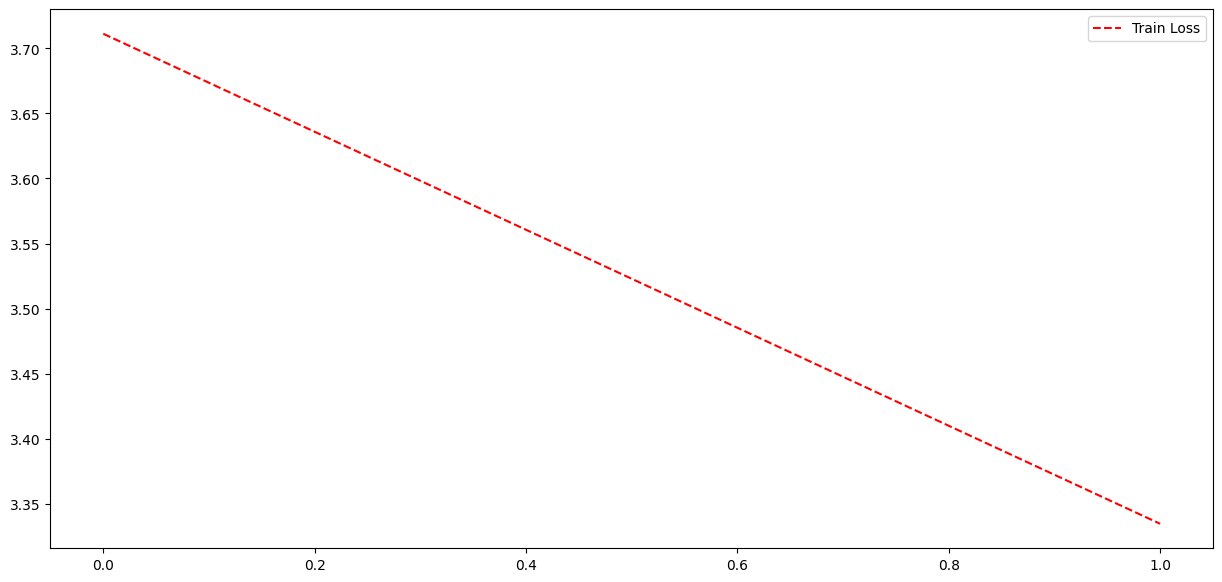

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib plotting library

plt.figure(figsize=(15, 7))       # Create a new figure with size 15x7 inches

plt.plot(range(len(total_losses)), total_losses, 'r--' ,label="Train Loss")
# Plot training losses with red dashed line and label
plt.legend()
# Display the legend to identify plotted lines

In [ ]:
checkpoint_path = "transformer_2.pth"  # Replace with your saved file
state_dict = torch.load(checkpoint_path, map_location=device)  # Load to CPU/GPU
transformer.load_state_dict(state_dict)

<All keys matched successfully>

### Transformer Decoding Function

**Purpose**: Generates responses using either greedy search or top-k sampling

**Key Features**:
- Supports two decoding modes:
  - `top_k=1`: Greedy decoding (always picks highest probability word)
  - `top_k>1`: Random sampling from top-k candidates
- Handles sequence termination when `<end>` token is generated
- Converts token IDs back to words using vocabulary mapping

**Workflow**:
1. Encodes input question
2. Initializes sequence with `<start>` token
3. Iteratively decodes:
   - Creates target mask for each step
   - Gets next word probabilities
   - Selects next word based on chosen strategy
4. Stops when max length reached or `<end>` token generated

**Inputs**:
- `question`: Encoded input sequence
- `question_mask`: Attention mask for input
- `max_len`: Maximum response length
- `word_map`: Vocabulary dictionary
- `top_k`: Controls decoding strategy

**Output**: Generated response string

In [ ]:
def evaluate(transformer, question, question_mask, max_len, word_map, top_k=1):
    """
    Performs decoding using either Greedy (top_k=1) or Top-k sampling (top_k > 1 or None)
    """
    import numpy as np

    # Initialize vocabulary and model mode
    rev_word_map = {v: k for k, v in word_map.items()}
    transformer.eval()
    start_token = word_map['<start>']
    end_token = word_map['<end>']

    # Encode input question
    encoded = transformer.encode(question, question_mask)
    words = torch.LongTensor([[start_token]]).to(device)  # Initialize with start token

    # Generate output sequence
    for step in range(max_len - 1):
        # Create target mask for decoder
        size = words.shape[1]
        target_mask = torch.triu(torch.ones(size, size)).transpose(0, 1).type(torch.uint8)
        target_mask = target_mask.to(device).unsqueeze(0)

        # Decode current sequence
        decoded = transformer.decode(words, target_mask, encoded, question_mask)
        predictions = transformer.logit(decoded[:, -1])  # Get last prediction
        probs = torch.softmax(predictions, dim=1).squeeze(0)  # Convert to probabilities

        # Select next word (greedy or sampling)
        if top_k != 1:
            if top_k is None:
                top_ch = np.arange(len(word_map))
                p = probs.detach().cpu().numpy()
            else:
                p, top_ch = torch.topk(probs, k=top_k)
                p = p.detach().cpu().numpy()
                top_ch = top_ch.detach().cpu().numpy()
            next_word = np.random.choice(top_ch, p=p/p.sum())
        else:
            next_word = torch.argmax(probs).item()

        # Stop if end token generated
        if next_word == end_token:
            break

        # Append new word to sequence
        next_word_tensor = torch.LongTensor([[next_word]]).to(device)
        words = torch.cat([words, next_word_tensor], dim=1)

    # Convert indices to words
    words = words.squeeze(0).tolist()
    sen_idx = [w for w in words if w != start_token]
    sentence = " ".join([rev_word_map[idx] for idx in sen_idx])

    return sentence

In [ ]:
while(1):
    # Get user input
    question = input("Question: ")
    if question == "quit":
        break

    # Process input sequence
    max_len = input("Max len: ")
    enc_qus = [word_map.get(word, word_map["<unk>"]) for word in question.split()]  # Convert words to indices

    # Prepare tensors for model
    question = torch.LongTensor(enc_qus).to(device).unsqueeze(0)  # Add batch dimension
    question_mask = (question!=0).to(device).unsqueeze(1).unsqueeze(1)  # Create attention mask

    # Generate and print response
    sentence = evaluate(transformer, question, question_mask, int(max_len), word_map, top_k=5)
    print("\nResponse:", sentence, "\n")

Question: tell me your name
Max len: 10
you dont know what i mean
Question: how are you today
Max len: 10
i was just trying to help you
Question: do you know me
Max len: 10
no i was going to tell you
Question: hello
Max len: 10
i dont know what to do with you
Question: quit
